# Part II: Machine Learning Analysis 

This is the continuation of "Sustainability_Analysis.ipynb" where the data from the UN's Global Sustainable Development Goals was cleaned and merged into the csv file below.

Analyzing the 3 most developed countries (Norway, Switzerland, Australia), 3 middle-ranked developed countries (Fiji, Jamaica, Jordan), and 3 less developed countries (Niger, Burkina Faso, Benin).
Country development ranking determined by the Human Development Index for 2020 referenced here: https://worldpopulationreview.com/countries/developed-countries/

In [1]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
# Read in the csv file
## Performing with US data, will change later
sustainability = pd.read_csv('data/us_electronic_waste_pc.csv')
sustainability

,Year,"Electronic waste generated, per capita (Kg)"
0,2000,11.728266
1,2001,12.280305
2,2002,12.839701
3,2003,13.447392
4,2004,14.106024
5,2005,14.778751
6,2006,15.475267
7,2007,16.123013
8,2008,16.716385
9,2009,17.286182


In [11]:
# Assign the data to X and y and reshape data into array

X = sustainability[["Year"]].values.reshape(-1, 1)
y = sustainability[Electronic waste generated, per capita (Kg)].values.reshape(-1, 1)
#y = whether or not met goal
print("Shape: ", X.shape, y.shape)
print(X)
print(y)

Shape:  (20, 1) (20, 1)
[[2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]]
[[11.728266]
 [12.280305]
 [12.839701]
 [13.447392]
 [14.106024]
 [14.778751]
 [15.475267]
 [16.123013]
 [16.716385]
 [17.286182]
 [17.816548]
 [18.36893 ]
 [18.95407 ]
 [19.494872]
 [19.925803]
 [20.26028 ]
 [20.475782]
 [20.659757]
 [20.824843]
 [20.991704]]


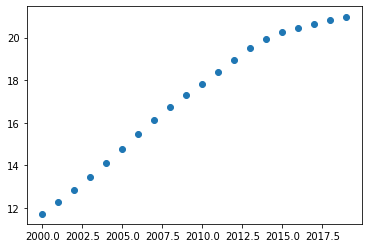

In [12]:
# Plot the data

plt.scatter(X, y)

In [13]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [14]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [15]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [16]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

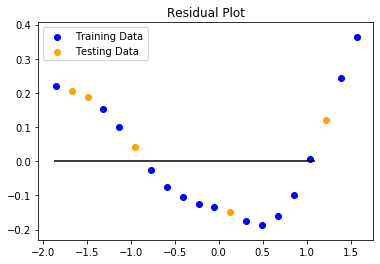

In [17]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [18]:
# Use X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.023142999729062638, R2: 0.9823920628967628
